Q1 . SMS SPAM COLLECTION DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/prashansha-murty/Assignment6ML-Qns/main/spam.csv",encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data.rename({"v1" : "Target", "v2" : "Message"}, axis = 1)
data.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

Target     0
Message    0
dtype: int64

In [ ]:
data["Target"].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data["Target"].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

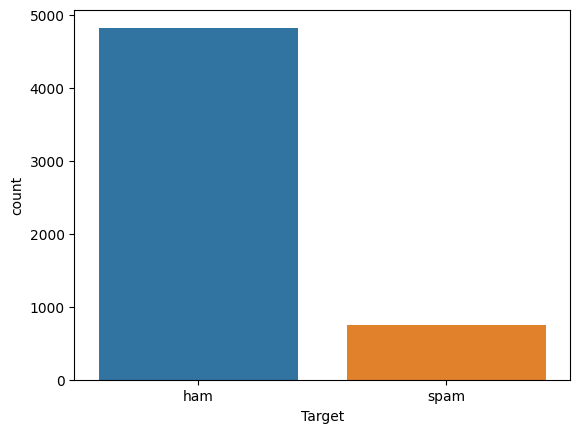

In [ ]:
sns.countplot(x = data[Target])

In [ ]:
data["Target_num"] = data.Target.map({'ham' : 1 , 'spam' : 0})
data.head()

,Target,Message,Target_num
0,ham,go until jurong point crazy available only in ...,1
1,ham,ok lar joking wif u oni,1
2,spam,free entry in 2 a wkly comp to win fa cup fina...,0
3,ham,u dun say so early hor u c already then say,1
4,ham,nah i dont think he goes to usf he lives aroun...,1


In [ ]:
data["Message"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
data["Message"] = data["Message"].str.lower()
data["Message"].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: Message, dtype: object

In [ ]:
import string
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(x):
  translator = str.maketrans(" "," ",punc)
  return x.translate(translator)

In [ ]:
data["Message"] = data["Message"].apply(lambda x: remove_punc(x))
data.tail()

,Target,Message,Target_num
5567,spam,this is the 2nd time we have tried 2 contact u...,0
5568,ham,will ì b going to esplanade fr home,1
5569,ham,pity was in mood for that soany other suggest...,1
5570,ham,the guy did some bitching but i acted like id ...,1
5571,ham,rofl its true to its name,1


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps

<PorterStemmer>

In [ ]:
def stemming_data(data):
  text = [ps.stem(data) for word in data]
  return data

In [ ]:
data["Message"] = data["Message"].apply(lambda x: stemming_data(x))
data.tail()

,Target,Message,Target_num
5567,spam,this is the 2nd time we have tried 2 contact u...,0
5568,ham,will ì b going to esplanade fr home,1
5569,ham,pity was in mood for that soany other suggest...,1
5570,ham,the guy did some bitching but i acted like id ...,1
5571,ham,rofl its true to its name,1


In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
wnl

<WordNetLemmatizer>

In [ ]:
def lemmatizer_on_text(data):
    text = [wnl.lemmatize(word) for word in data]
    return data

data['Message'] = data['Message'].apply(lambda x : lemmatizer_on_text(x))
data.tail()

,Target,Message,Target_num
5567,spam,this is the 2nd time we have tried 2 contact u...,0
5568,ham,will ì b going to esplanade fr home,1
5569,ham,pity was in mood for that soany other suggest...,1
5570,ham,the guy did some bitching but i acted like id ...,1
5571,ham,rofl its true to its name,1


In [ ]:
X = data.drop("Target_num",axis=1)
y = data["Target_num"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
X_train = X_train.drop('Target', axis = 1)
X_train

,Message
4380,mathews or tait or edwards or anderson
3887,oktake careumma to you too
4755,dont make life too stressfull always find time...
2707,great new offer double mins double txt on be...
4747,the beauty of life is in next second which hid...
...,...
4931,match startedindia ltgt for 2
3264,44 7732584351 do you want a new nokia 3510i co...
1653,i was at bugis juz now wat but now im walking ...
2607,yeah lol luckily i didnt have a starring role...


In [ ]:
X_test = X_test.drop("Target",axis=1)
X_test

,Message
4456,aight should i just plan to come up later tonight
690,was the farm open
944,i sent my scores to sophas and i had to do sec...
3768,was gr8 to see that message so when r u leavin...
1189,in that case i guess ill see you at campus lodge
...,...
4833,i hope your pee burns tonite
3006,ah you see you have to be in the lingo i will ...
509,your opinion about me 1 over 2 jada 3 kusruthi...
1761,got ur mail dileepthank you so muchand look fo...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv

CountVectorizer()

In [ ]:
cv.fit(X_train["Message"])

CountVectorizer()

In [ ]:
X_train = cv.transform(X_train["Message"])
X_test = cv.transform(X_test["Message"])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [ ]:
X_train.shape

(3900, 7663)

In [ ]:
y_train.shape

(3900,)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766746411483254

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb

BernoulliNB()

In [ ]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bnb)

0.9629186602870813